In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
filename = 'data/raw_data/rt_trips_DB_2018.txt'
df = pd.read_csv(filename, parse_dates=['DAYOFSERVICE', 'LASTUPDATE'], sep=';')

In [4]:
df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2526331,"


In [5]:
# check the data types
df.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                       object
dtype: object

In [6]:
# print some descriptors of the data
df.describe(datetime_is_numeric=True).T 

,count,mean,min,25%,50%,75%,max,std
DAYOFSERVICE,2182637,2018-06-28 17:25:38.969786880,2018-01-01 00:00:00,2018-03-31 00:00:00,2018-06-28 00:00:00,2018-09-26 00:00:00,2018-12-31 00:00:00,NaN
TRIPID,2182637.0,7149479.174758,5955221.0,6592584.0,7110090.0,8018241.0,8592207.0,731442.265466
DIRECTION,2182637.0,1.504103,1.0,1.0,2.0,2.0,2.0,0.499983
PLANNEDTIME_ARR,2182637.0,55078.747653,18203.0,39683.0,55276.0,69006.0,91680.0,17424.822304
PLANNEDTIME_DEP,2182637.0,51533.29282,16200.0,36000.0,51600.0,65160.0,87600.0,17571.637274
ACTUALTIME_ARR,2045430.0,55062.38828,17546.0,39668.0,55189.0,69019.0,94378.0,17338.699154
ACTUALTIME_DEP,2018086.0,51706.116583,15974.0,36518.0,51618.0,65398.0,97177.0,17526.948184
TENDERLOT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUPPRESSED,4333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JUSTIFICATIONID,4330.0,237554.867667,177856.0,205506.5,233851.5,271506.75,297899.0,34585.051789


We can see that the columns for 'PLANNEDTIME' and 'ACTUALTIME' departure and arrival are in seconds from midnight. The TENDERLOT column appears to hold no values, and so will be dropped from the dataset in the data quality plan.
We can also see that the SUPPRESSED and JUSTIFICATIONID columns appear to only have 4,330 rows of data, far less than the other columns' counts. The relevance of these columns will have to be examined further.

This also shows that there are no negative values in the planned/actual time columns which shows that the logical integrity of the data is good so far.

In [7]:
df.isnull().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
LINEID                   0
ROUTEID                  0
DIRECTION                0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR      137207
ACTUALTIME_DEP      164551
BASIN                    0
TENDERLOT          2182637
SUPPRESSED         2178304
JUSTIFICATIONID    2178307
LASTUPDATE               0
NOTE                     0
dtype: int64

As previously described, there is a large portion of rows containing null values for some columns. The ACTUALTIME columns also appear to be missing some data which will likely require dropping these rows from the dataset later on.

In [8]:
df.nunique()

DATASOURCE              1
DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68122
ACTUALTIME_DEP      66771
BASIN                   1
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
LASTUPDATE            360
NOTE                46690
dtype: int64

The above result shows the cardinality of the features in the dataset. We can see that some columns only hold one unqiue value. The value these columns add to the dataset will have to be examined further.

#### Changing dtypes

In [9]:
# select all columns with object datatype
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols

Index(['DATASOURCE', 'LINEID', 'ROUTEID', 'BASIN', 'NOTE'], dtype='object')

In [10]:
# select columns with categorical data and add to list
categorical_cols = categorical_cols.append(df[['TRIPID', 'DIRECTION', 'TENDERLOT', 'SUPPRESSED', 'JUSTIFICATIONID']].columns)
categorical_cols

Index(['DATASOURCE', 'LINEID', 'ROUTEID', 'BASIN', 'NOTE', 'TRIPID',
       'DIRECTION', 'TENDERLOT', 'SUPPRESSED', 'JUSTIFICATIONID'],
      dtype='object')

In [11]:
# convert columns in the list to categorical columns
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                    category
TENDERLOT                category
SUPPRESSED               category
JUSTIFICATIONID          category
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

In [12]:
# check for duplicate rows
df.duplicated().value_counts()

False    2182637
dtype: int64

There are no duplicate rows in the dataframe.

In [13]:
# check the rows are within the required dates 
test_timeframe = df['DAYOFSERVICE'].dt.year == 2018
test_timeframe.value_counts()

True    2182637
Name: DAYOFSERVICE, dtype: int64

All rows are within the required timeframe.

### Descriptive statistics
#### Continuous features

In [14]:
# print descriptive stats for the continuous columns

# first select the columns
continuous_cols = df.select_dtypes(['int64', 'float64', 'datetime64[ns]']).columns

# descriptive column
con_descriptive_df = df[continuous_cols].describe(datetime_is_numeric=True).T 

con_descriptive_df

,count,mean,min,25%,50%,75%,max,std
DAYOFSERVICE,2182637,2018-06-28 17:25:38.969786880,2018-01-01 00:00:00,2018-03-31 00:00:00,2018-06-28 00:00:00,2018-09-26 00:00:00,2018-12-31 00:00:00,NaN
PLANNEDTIME_ARR,2182637.0,55078.747653,18203.0,39683.0,55276.0,69006.0,91680.0,17424.822304
PLANNEDTIME_DEP,2182637.0,51533.29282,16200.0,36000.0,51600.0,65160.0,87600.0,17571.637274
ACTUALTIME_ARR,2045430.0,55062.38828,17546.0,39668.0,55189.0,69019.0,94378.0,17338.699154
ACTUALTIME_DEP,2018086.0,51706.116583,15974.0,36518.0,51618.0,65398.0,97177.0,17526.948184
LASTUPDATE,2182637,2018-07-16 10:25:44.996667392,2018-01-08 17:21:10,2018-04-10 15:08:12,2018-07-13 19:47:00,2018-10-23 06:57:21,2019-01-16 18:27:21,NaN


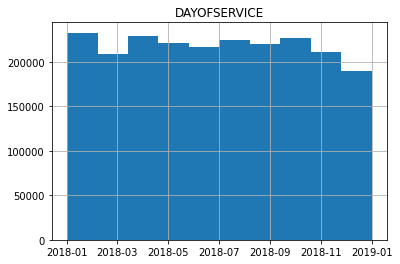

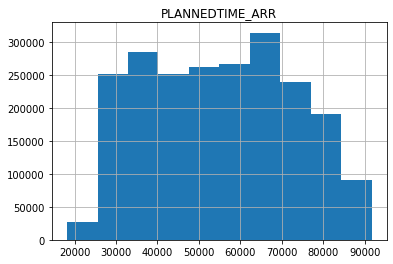

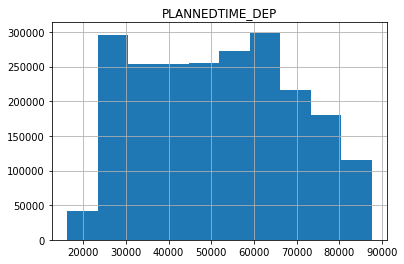

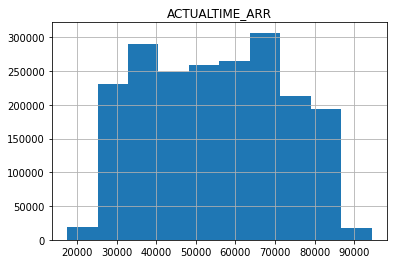

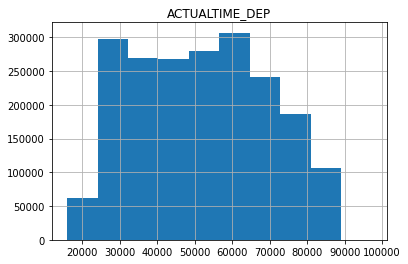

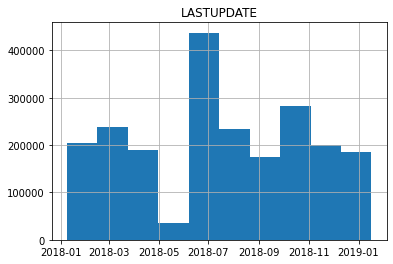

In [15]:
for col in continuous_cols:
 df[col].hist()
 plt.title(col)
 plt.show()

In [16]:
# print descriptives for categorical columns
cardinality = df[categorical_cols].nunique()
cardinality

DATASOURCE              1
LINEID                130
ROUTEID               588
BASIN                   1
NOTE                46690
TRIPID             658964
DIRECTION               2
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
dtype: int64

In [17]:
null_count = df[categorical_cols].isnull().sum()
null_count

DATASOURCE               0
LINEID                   0
ROUTEID                  0
BASIN                    0
NOTE                     0
TRIPID                   0
DIRECTION                0
TENDERLOT          2182637
SUPPRESSED         2178304
JUSTIFICATIONID    2178307
dtype: int64

In [18]:
df[categorical_cols].describe()

,DATASOURCE,LINEID,ROUTEID,BASIN,NOTE,TRIPID,DIRECTION,TENDERLOT,SUPPRESSED,JUSTIFICATIONID
count,2182637,2182637,2182637,2182637,2182637,2182637,2182637,0,4333.0,4330.0
unique,1,130,588,1,46690,658964,2,0,1.0,3526.0
top,DB,46A,46A_74,BasDef,",2703274,",7327038,2,NaN,0.0,203708.0
freq,2182637,76728,37182,2182637,244,19,1100273,NaN,4333.0,19.0


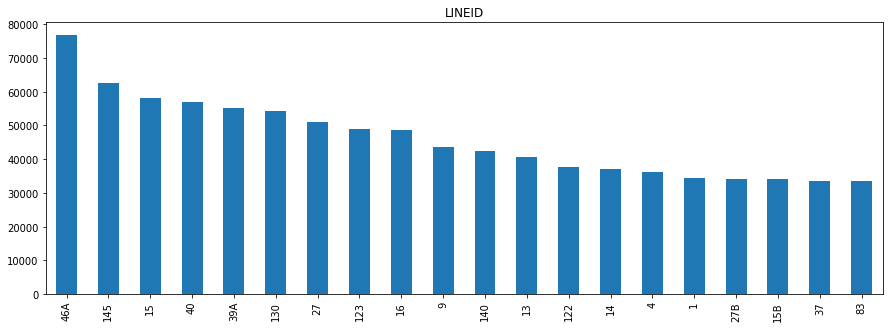

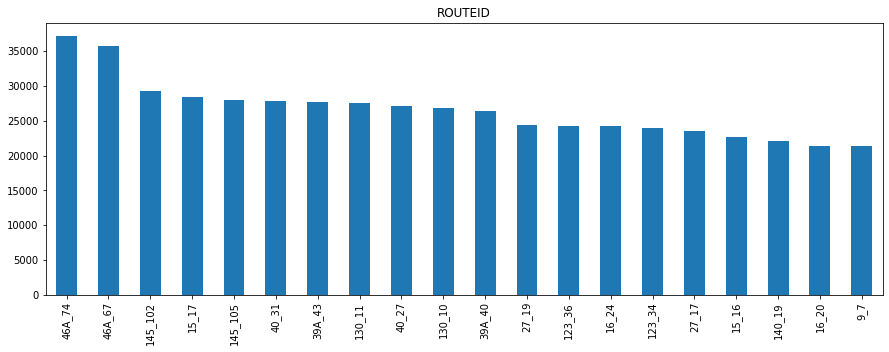

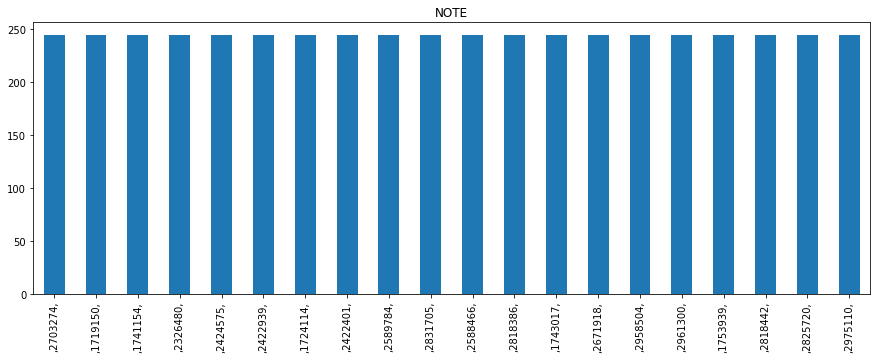

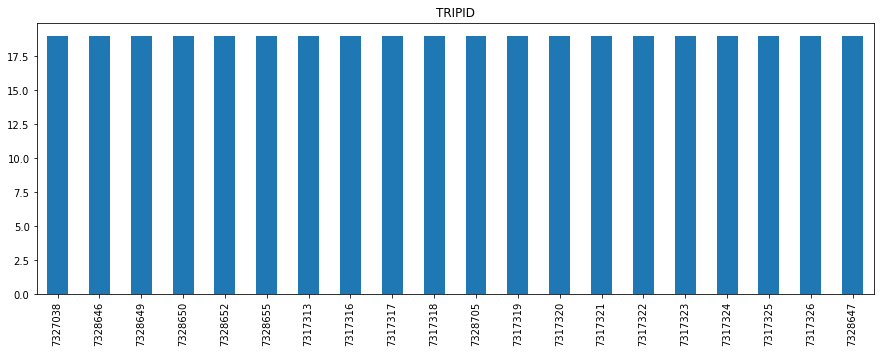

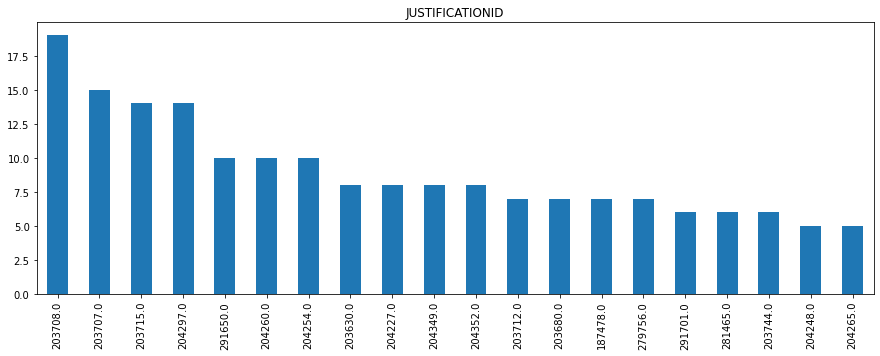

In [19]:
high_card_cols = df[['LINEID', 'ROUTEID', 'NOTE','TRIPID','JUSTIFICATIONID']]
for col in high_card_cols:
    df[col].value_counts(dropna=True)[:20].plot(kind='bar', title=col, figsize=(15,5))
    plt.show()

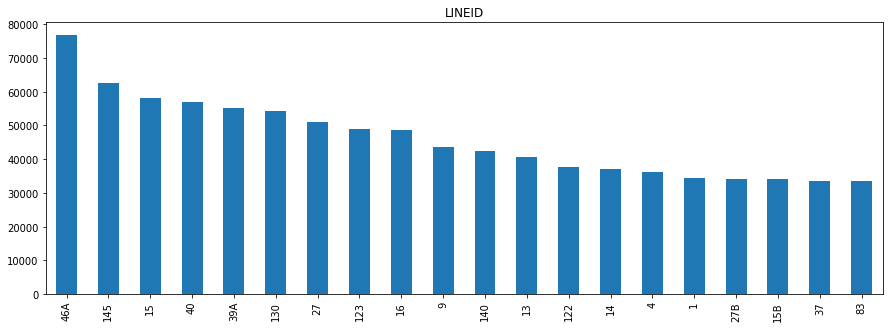

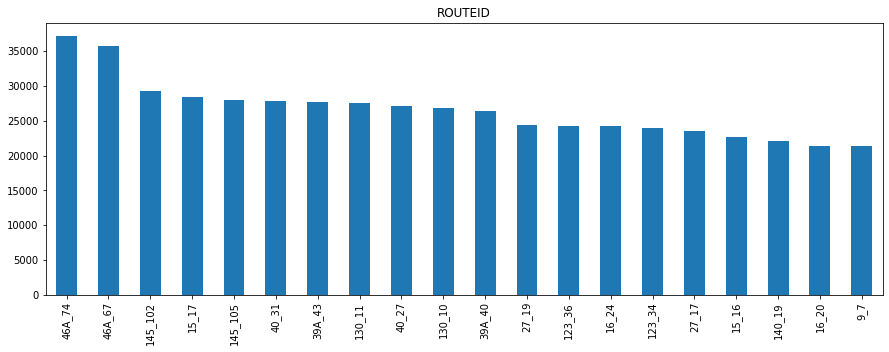

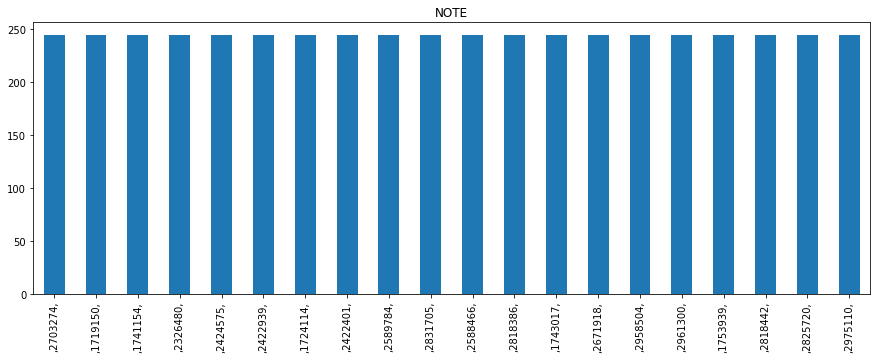

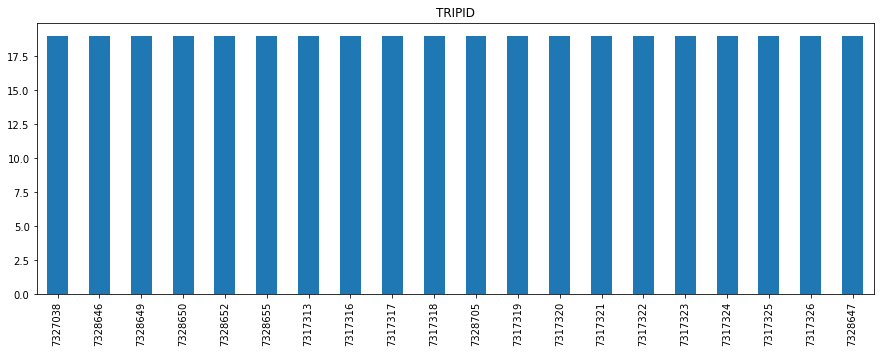

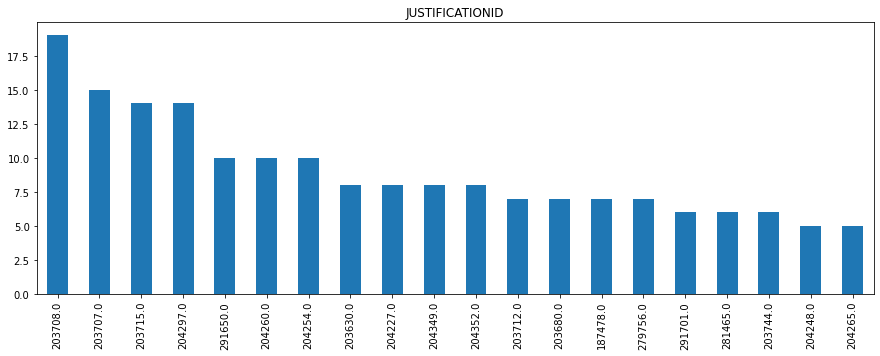

In [20]:
for col in high_card_cols:
    df[col].value_counts(dropna=True)[:20].plot(kind='bar', title=col, figsize=(15,5))
    plt.show()

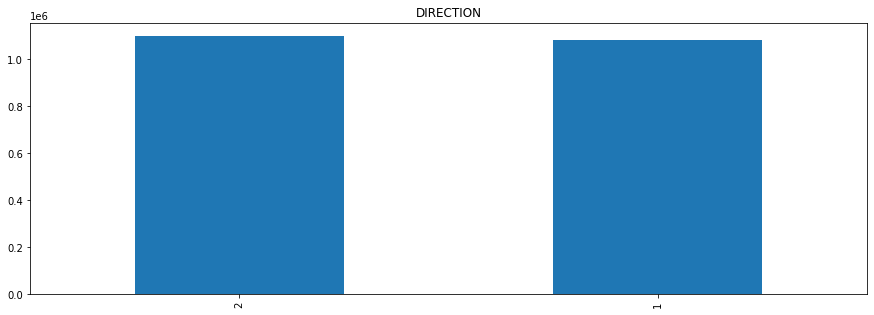

In [22]:
# plot bar chart for 'DIRECTION'
df['DIRECTION'].value_counts(dropna=True).plot(kind='bar', title='DIRECTION', figsize=(15,5))
plt.show()